# Exploratory Data Analysis of Power Co data

## Introduction 

### Client Data description 

●id = client company identifier
● activity_new = category of the company’s activity
● channel_sales = code of the sales channel
● cons_12m = electricity consumption of the past 12 months
● cons_gas_12m = gas consumption of the past 12 months
● cons_last_month = electricity consumption of the last month
● date_activ = date of activation of the contract
● date_end = registered date of the end of the contract
● date_modif_prod = date of the last modification of the product
● date_renewal = date of the next contract renewal
● forecast_cons_12m = forecasted electricity consumption for next 12 months
● forecast_cons_year = forecasted electricity consumption for the next calendar year
● forecast_discount_energy = forecasted value of current discount
● forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
● forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
● forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
● forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
● has_gas = indicated if client is also a gas client
● imp_cons = current paid consumption
● margin_gross_pow_ele = gross margin on power subscription
● margin_net_pow_ele = net margin on power subscription
● nb_prod_act = number of active products and services
● net_margin = total net margin
● num_years_antig = antiquity of the client (in number of years)
● origin_up = code of the electricity campaign the customer first subscribed to
● pow_max = subscribed power
● churn = has the client churned over the next 3 months

### Price Data description
● id = client company identifier
● price_date = reference date
● price_off_peak_var = price of energy for the 1st period (off peak)
● price_peak_var = price of energy for the 2nd period (peak)
● price_mid_peak_var = price of energy for the 3rd period (mid peak)
● price_off_peak_fix = price of power for the 1st period (off peak)
● price_peak_fix = price of power for the 2nd period (peak)
● price_mid_peak_fix = price of power for the 3rd period (mid peak)


In [1]:
## Gathering data

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from random import seed
from scipy.stats import ttest_ind

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
plt.style.use('fivethirtyeight')
sns.set(color_codes=True)
plt.style.use('fivethirtyeight')

# Show all columns in a dataframe
pd.set_option('display.max_columns', None)


In [2]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

In [3]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


#### . missing values in Channel sales column
#### . Has gas values need to be in Boolean format

In [4]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
client_df.shape

(14606, 26)

In [6]:
price_df.shape

(193002, 8)

In [7]:
client_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         


#### Date variables mistyped as object. They should be Datetime

In [8]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


#### Price date needs to be datetime type

In [9]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [10]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [11]:
client_df.isnull().sum()[client_df.isnull().sum()>0]

Series([], dtype: int64)

In [12]:
price_df.isnull().sum()[price_df.isnull().sum()>0]

Series([], dtype: int64)

In [13]:
client_df.duplicated().sum()

0

In [14]:
price_df.duplicated().sum()

0

# Data Cleaning

In [15]:
client_df['channel_sales'].replace('MISSING', np.nan, inplace=True)
client_df['origin_up'].replace('MISSING', np.nan, inplace=True)

In [16]:
client_df['channel_sales']

0        foosdfpfkusacimwkcsosbicdxkicaua
1                                     NaN
2        foosdfpfkusacimwkcsosbicdxkicaua
3        lmkebamcaaclubfxadlmueccxoimlema
4                                     NaN
                       ...               
14601    foosdfpfkusacimwkcsosbicdxkicaua
14602    foosdfpfkusacimwkcsosbicdxkicaua
14603    foosdfpfkusacimwkcsosbicdxkicaua
14604    foosdfpfkusacimwkcsosbicdxkicaua
14605                                 NaN
Name: channel_sales, Length: 14606, dtype: object

In [17]:
client_df['origin_up'].unique()

array(['lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci', nan,
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

In [18]:
## Create a function to convert all object values to datetime format

def convert_to_datetime(df, columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col])

In [19]:
convert_to_datetime(client_df, ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'])
convert_to_datetime(price_df, ['price_date'])

In [20]:
client_df[['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']].dtypes

date_activ         datetime64[ns]
date_end           datetime64[ns]
date_modif_prod    datetime64[ns]
date_renewal       datetime64[ns]
dtype: object

In [21]:
# Replace t with True and f with False
client_df['has_gas'] = np.where(client_df['has_gas']=='t', True, False)

In [22]:
client_df['has_gas'].dtypes

dtype('bool')

# EDA

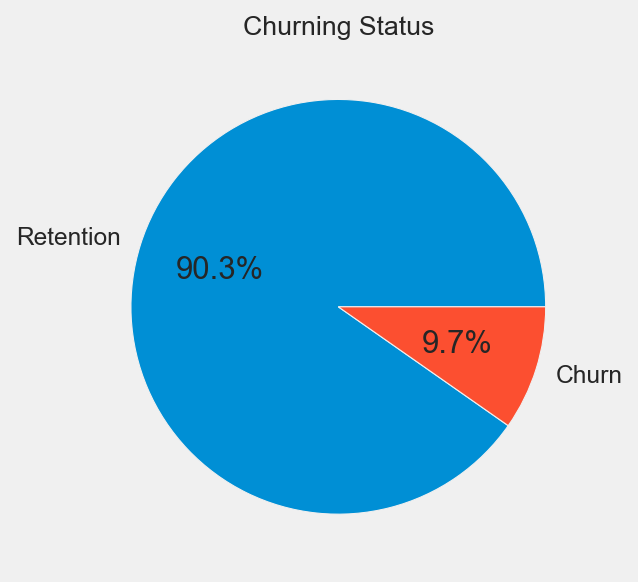

In [23]:
churned = client_df['churn'].value_counts()
plt.figure(figsize=(4,4), dpi=160)
plt.pie(churned.values, labels=['Retention','Churn'], autopct='%1.1f%%')
plt.title('Churning Status', fontsize=12)
plt.show()

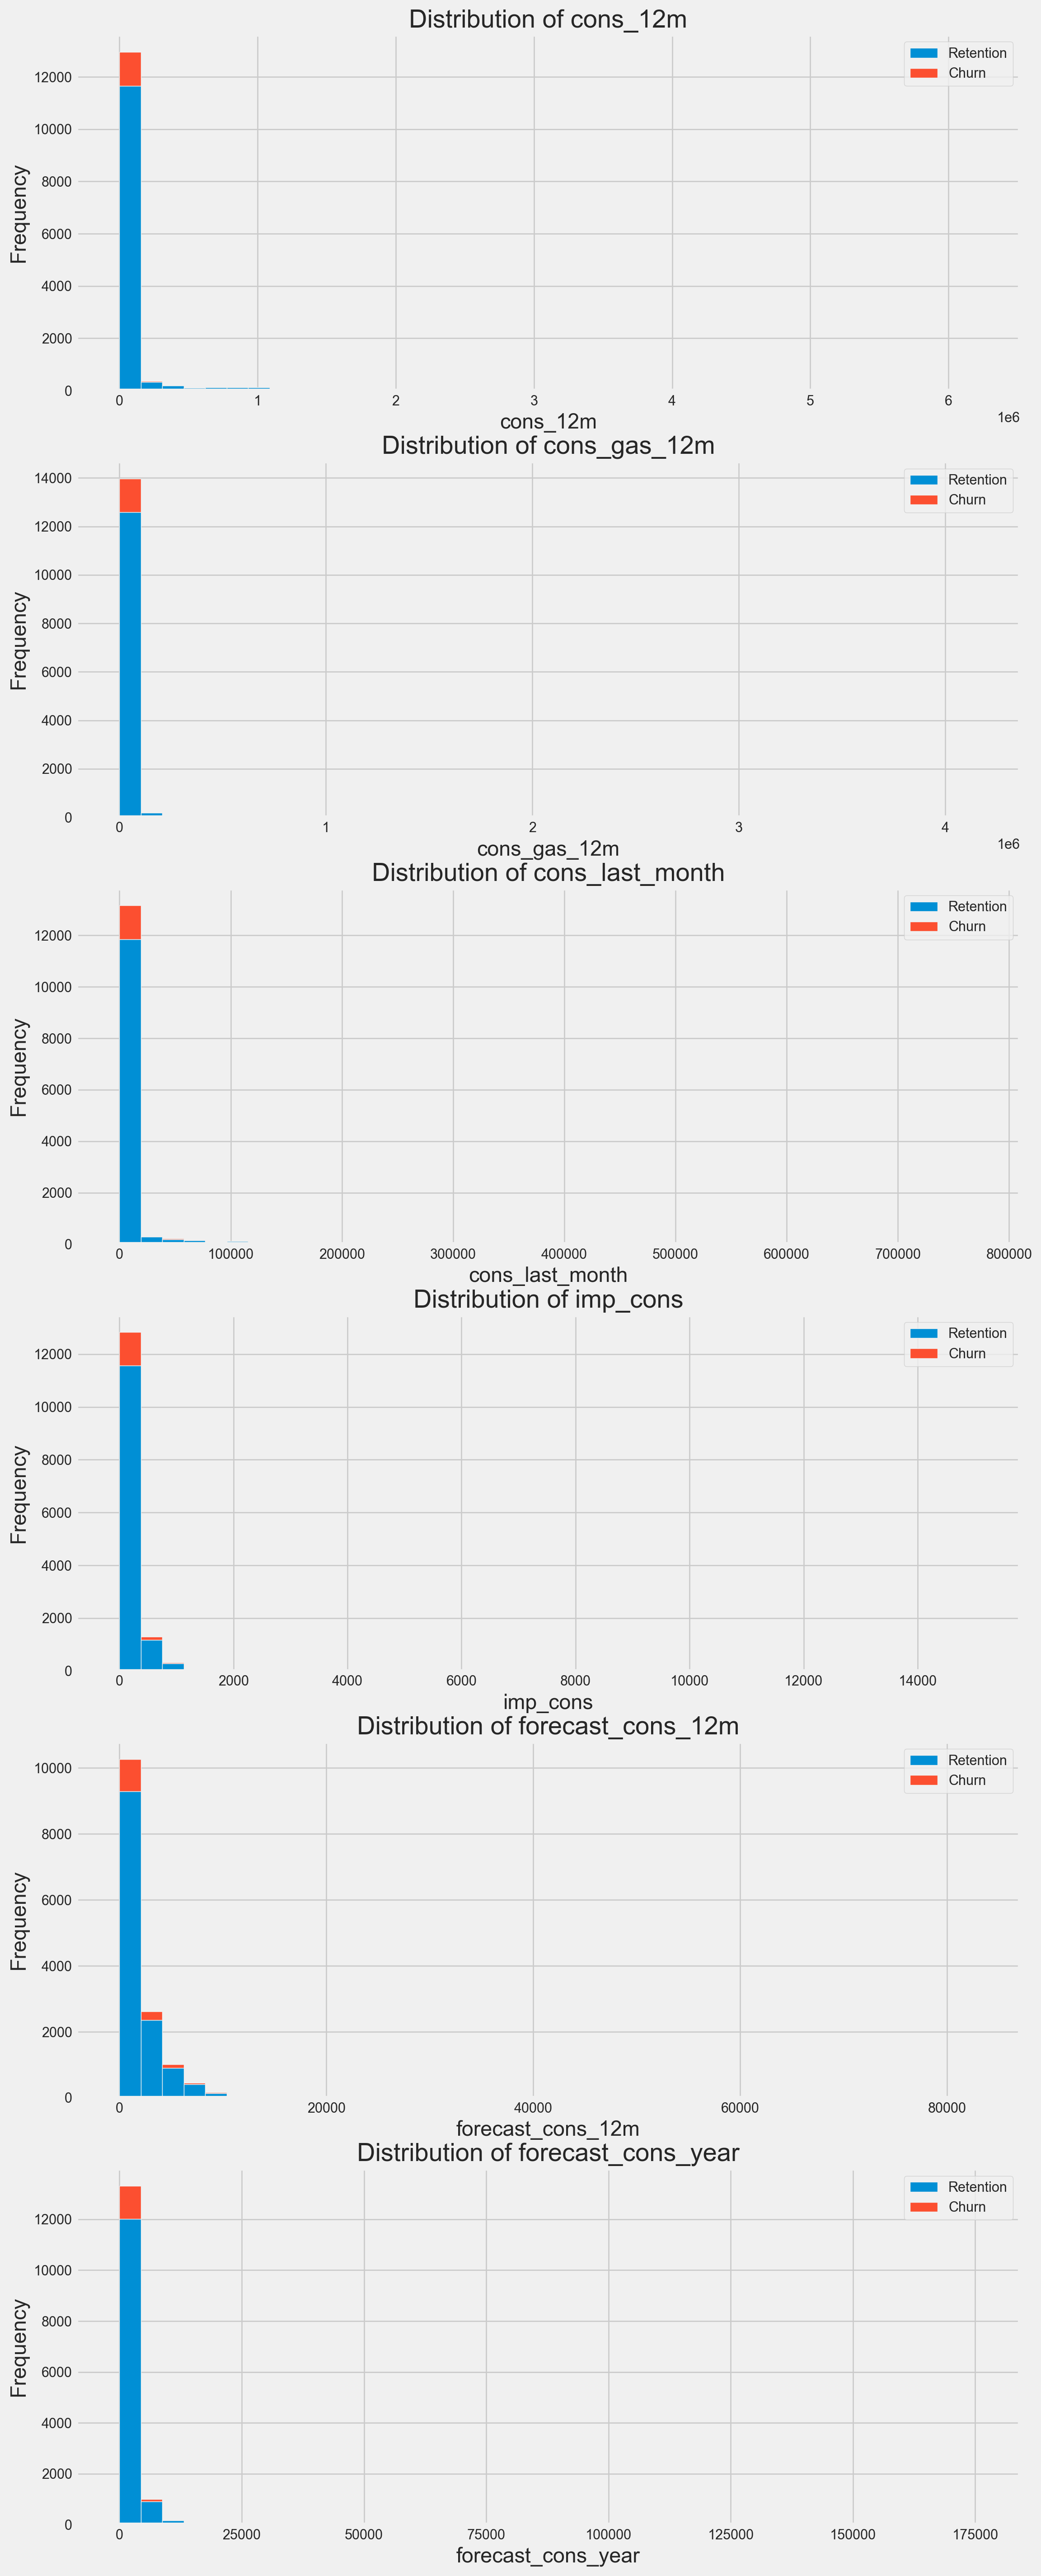

In [24]:
fig, axs = plt.subplots(6,1,figsize=(12,34), dpi=200)
for ax, column in zip(axs,['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'forecast_cons_12m', 'forecast_cons_year']):
    temp = pd.DataFrame({"Retention": client_df[client_df["churn"]==0][column],
    "Churn":client_df[client_df["churn"]==1][column]})
    temp[["Retention","Churn"]].plot(kind='hist', bins=40, ax=ax, stacked=True)
    ax.set_xlabel(column)
    ax.set_title(f'Distribution of {column}')
plt.show()

### Data is highly positively skewed

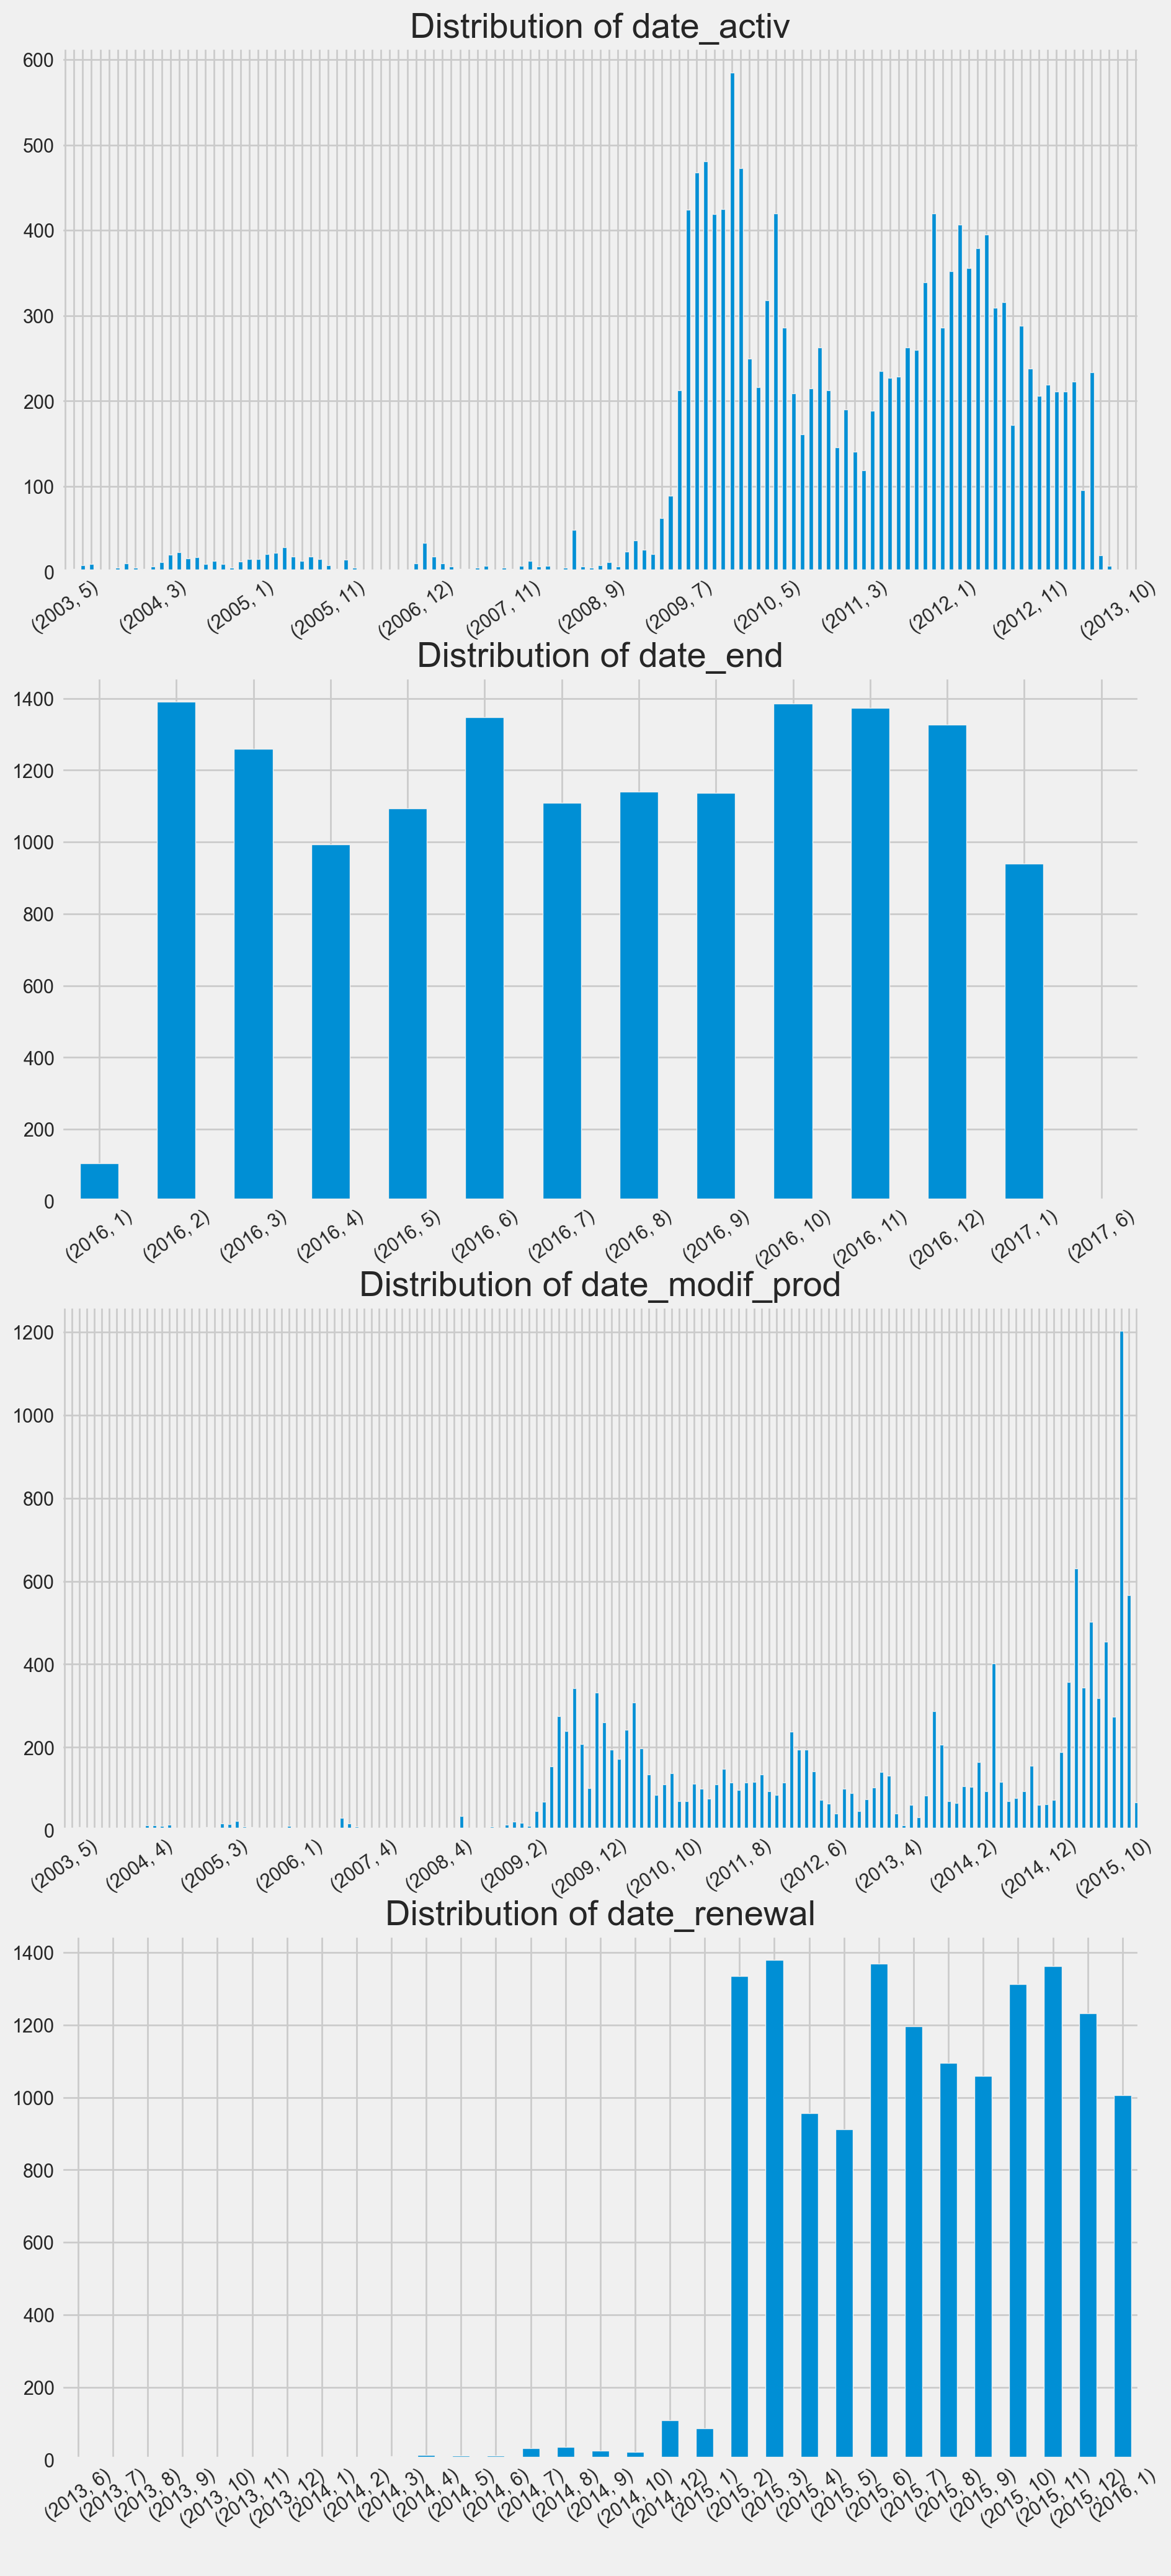

In [25]:
fig, axs = plt.subplots(4,1,figsize=(10,24), dpi=200)
for ax, column in zip(axs,['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']):
    temp = client_df[column].value_counts()
    client_df.groupby([client_df[column].dt.year, client_df[column].dt.month])['id'].count().plot(kind="bar", ax=ax)
    # sns.histplot(temp, bins=20, ax=ax)
    ax.set_xlabel(' ')
    ax.set_title(f'Distribution of {column}')
    plt.xticks(rotation = 45)
    xticks = ax.xaxis.get_major_ticks()
    if len(xticks)>40:
        for i in range(len(xticks)):
            if i%10 != 0:
                xticks[i].label1.set_visible(False)
    for tick in ax.get_xticklabels():
        tick.set_rotation(35)
plt.show()

**Insights**
- Most customers are acquired between mid 2009 and the beginning 2013.
- All the contracts in the dataset will expire on 2016 or January, 2017.
- With the increase in customer acquisition, there was an increase in modifications of the product.
- Most contracts are scheduled to be renewed by 2015.

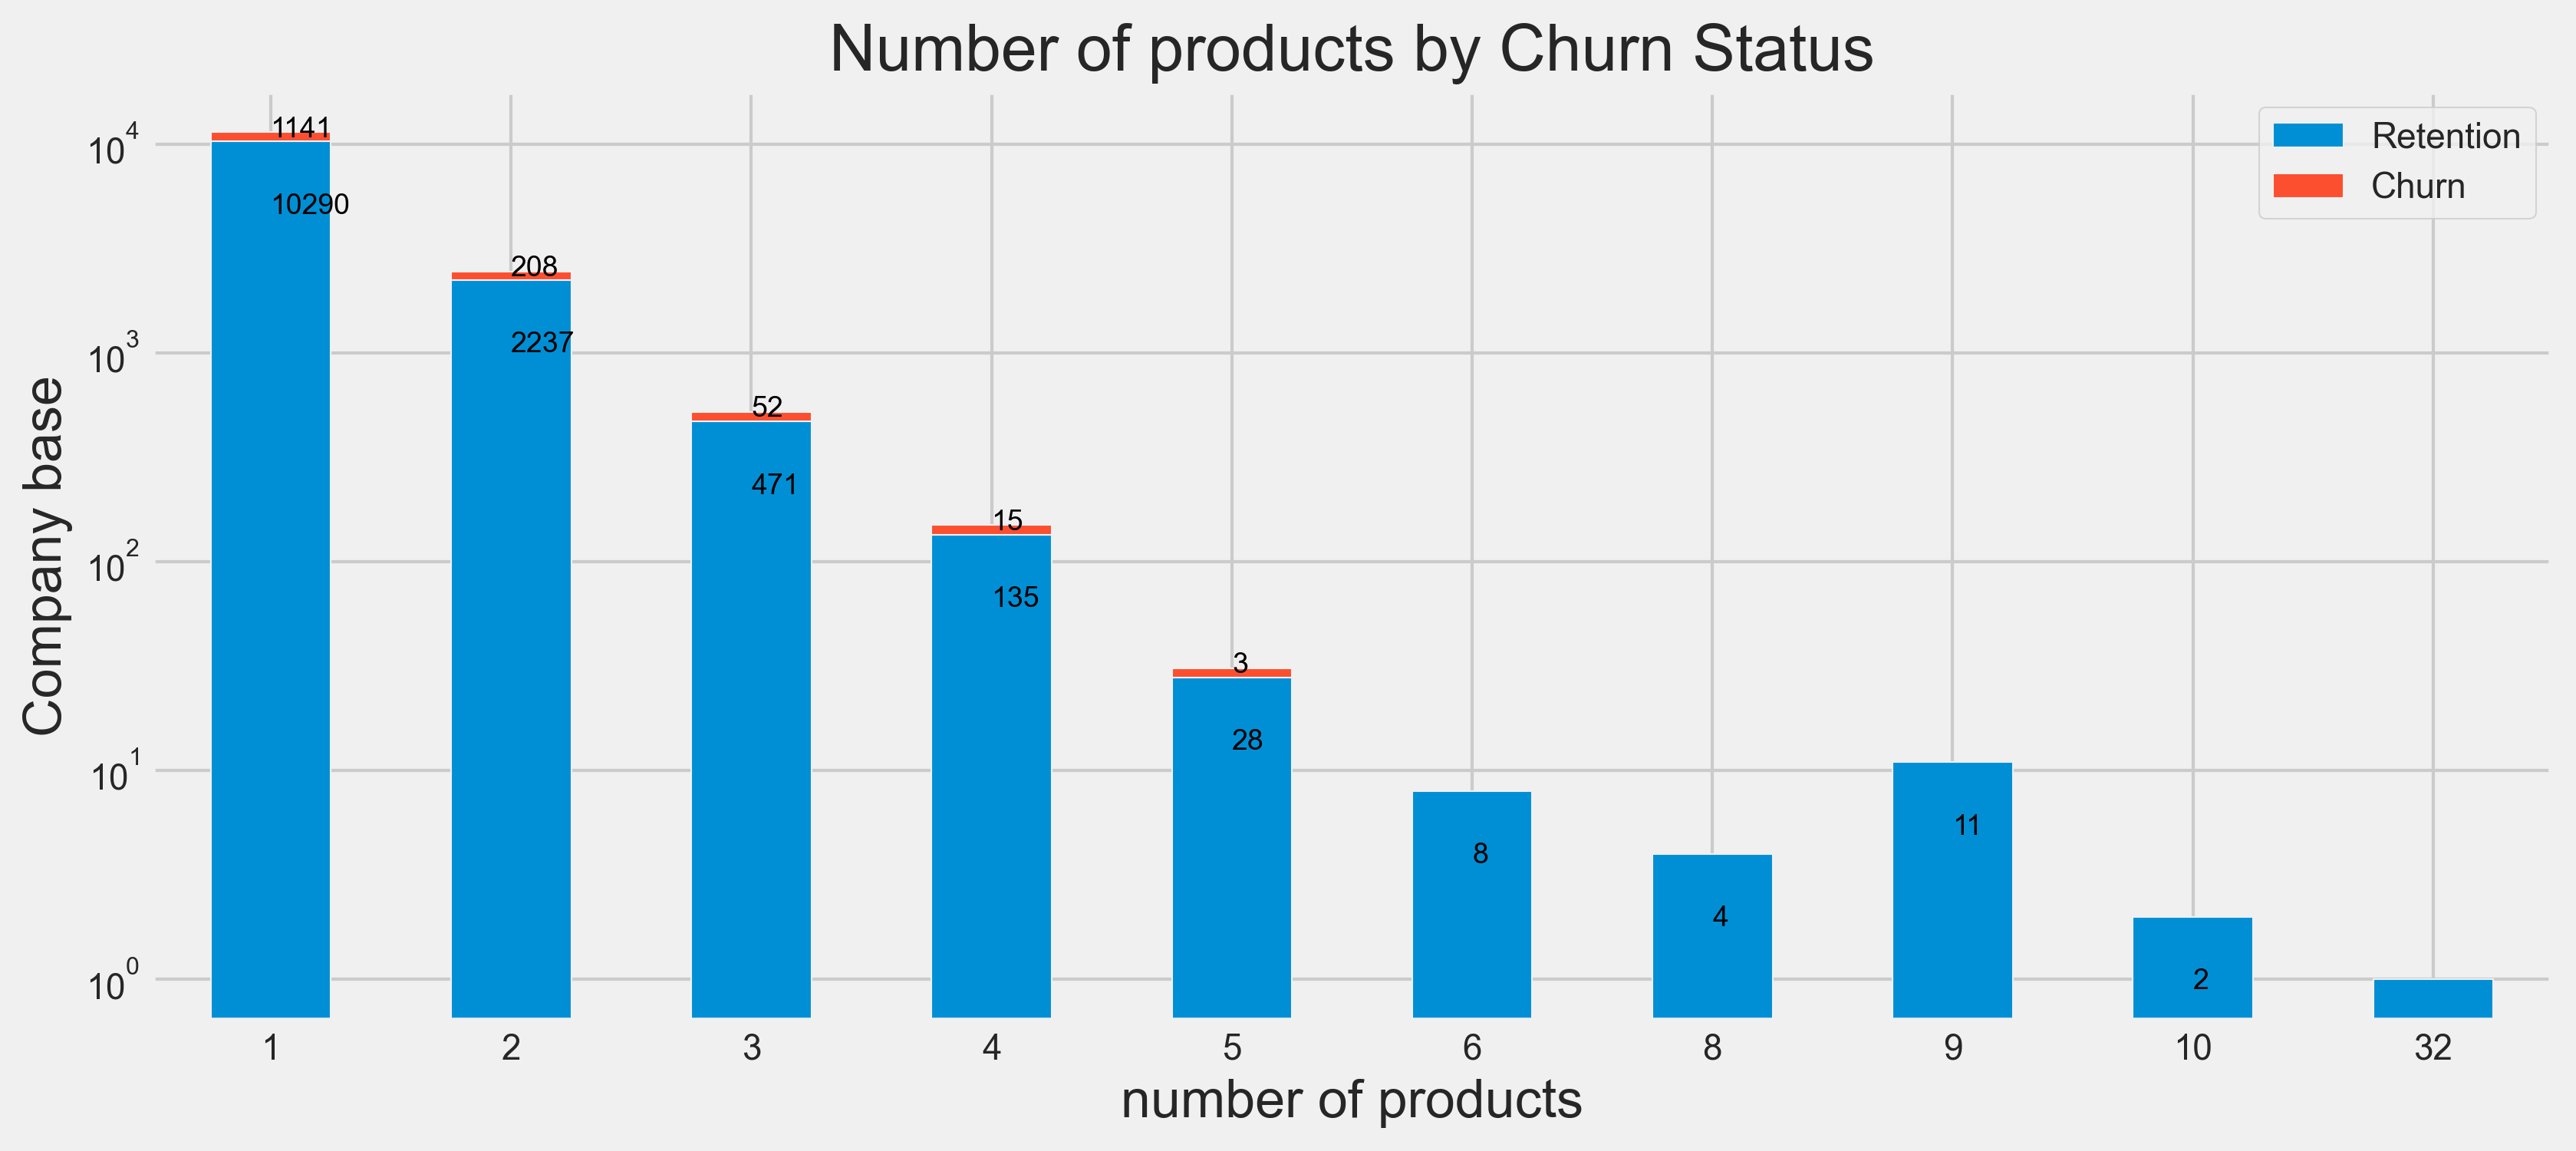

In [26]:
others=client_df[['id','nb_prod_act','num_years_antig','origin_up','churn']]
products=others.groupby([others['nb_prod_act'],others['churn']])['id'].count().unstack(level=1)
products_percentage=(products.div(products.sum(axis=1),axis=0)*100).sort_index()
ax=products.plot(kind='bar',stacked=True,figsize=(12,5),rot=0)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value[:-2],((p.get_x()+p.get_width()/2),p.get_y()+p.get_height()/2*0.9),
               color='black',size=(9))
ax.set_yscale('log')
plt.gcf().set_dpi(300)
plt.xlabel('number of products')
plt.title('Number of products by Churn Status')
plt.legend(['Retention','Churn'],loc="upper right")
plt.ylabel("Company base");

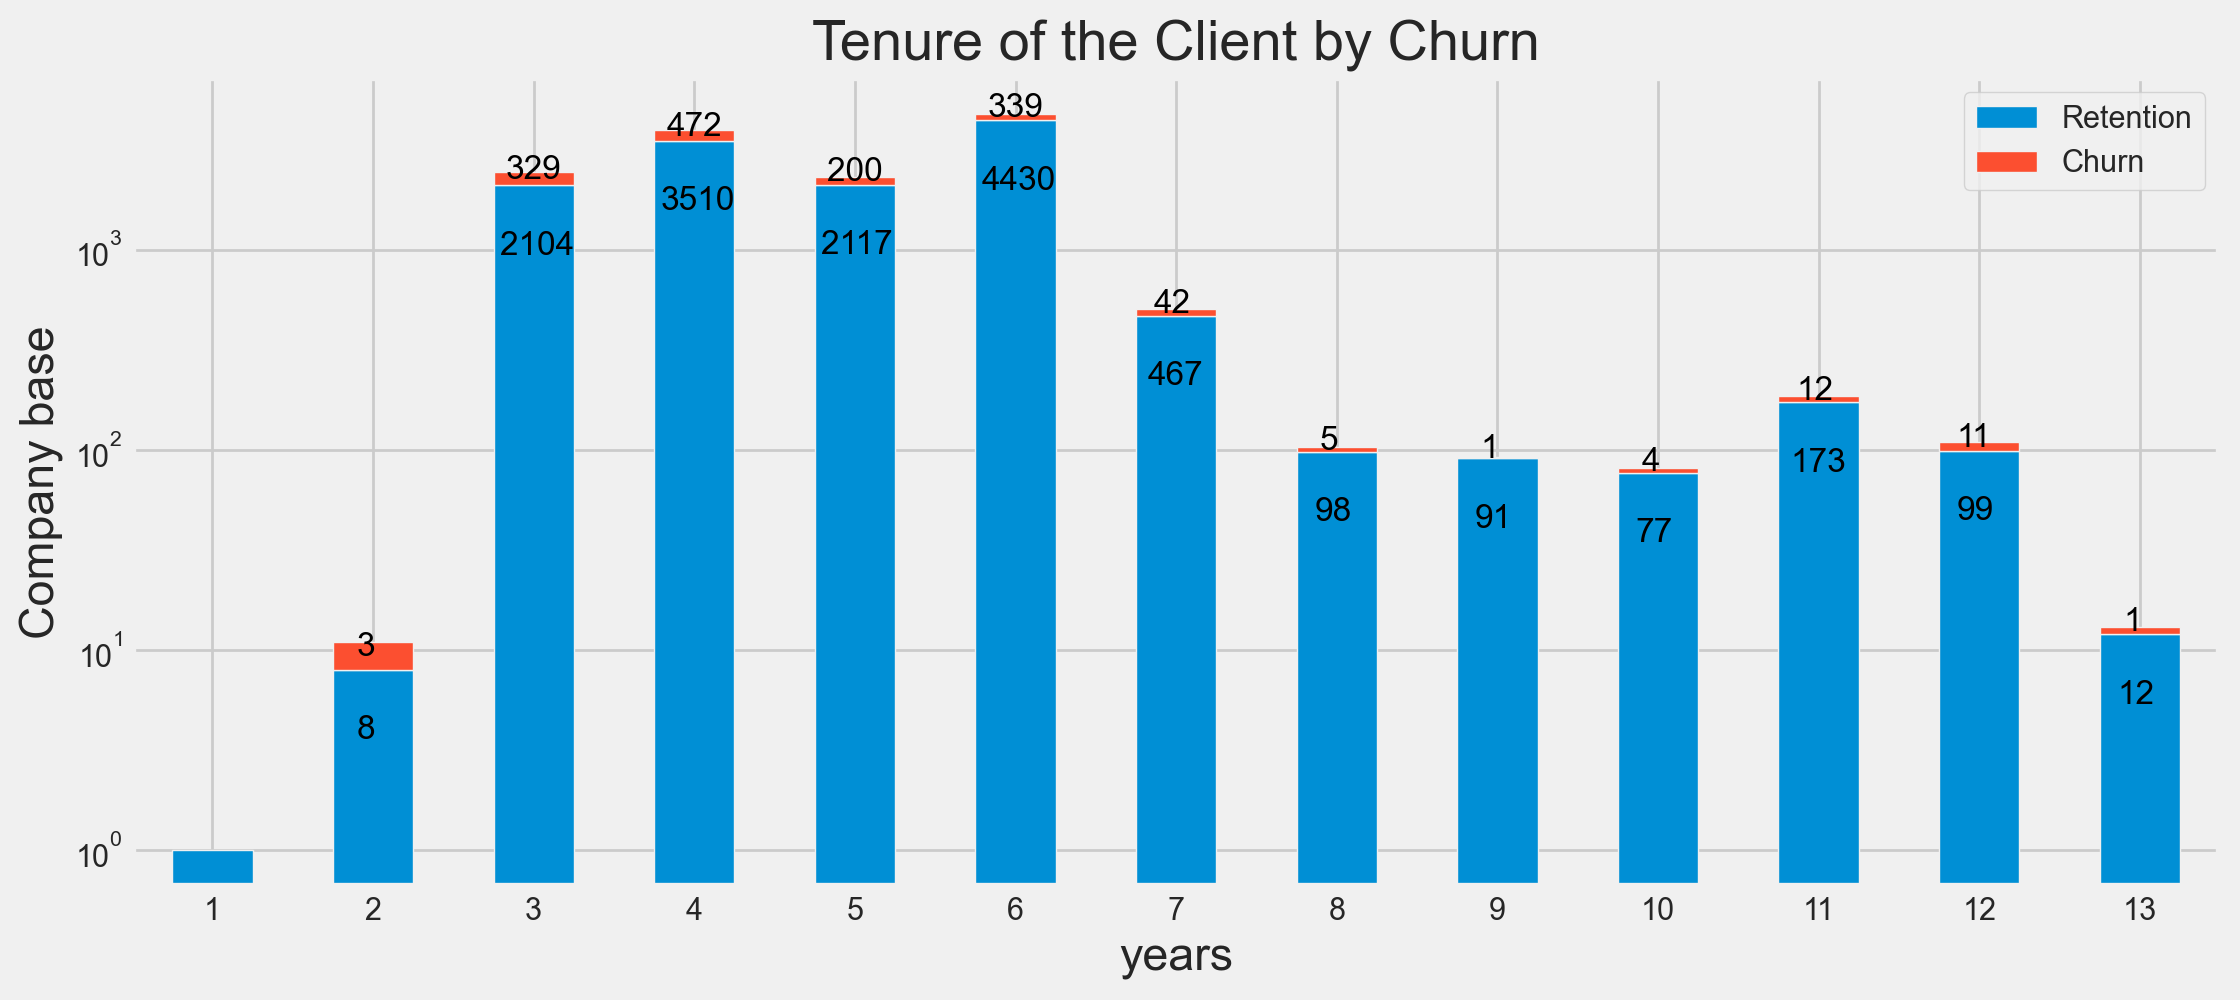

In [27]:
years_antig=others.groupby([others['num_years_antig'],others['churn']])['id'].count().unstack(level=1)
ax=years_antig.plot(kind='bar',stacked=True,figsize=(12,5),rot=0)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value[:-2],((p.get_x()+p.get_width()/2)-0.035*len(value),p.get_y()+p.get_height()/2*0.9),
               color='black',size=(12))
ax.set_yscale('log')
plt.gcf().set_dpi(200)
plt.xlabel('years')
plt.title('Tenure of the Client by Churn')
plt.legend(['Retention','Churn'],loc="upper right")
plt.ylabel("Company base");

> **Antiquity of the client:** refers to the length of time that a client has been doing business with a company. It can be used to describe the historical relationship between the client and the company, including the frequency and duration of transactions, as well as the level of loyalty and trust that has developed over time.

**Insights**
- **94.4%** of SME clients who churned have been with the company between **3** to **6** years.
- A concerning number of **28** SME have churned after being clients for PowerCo for more than **10** years.

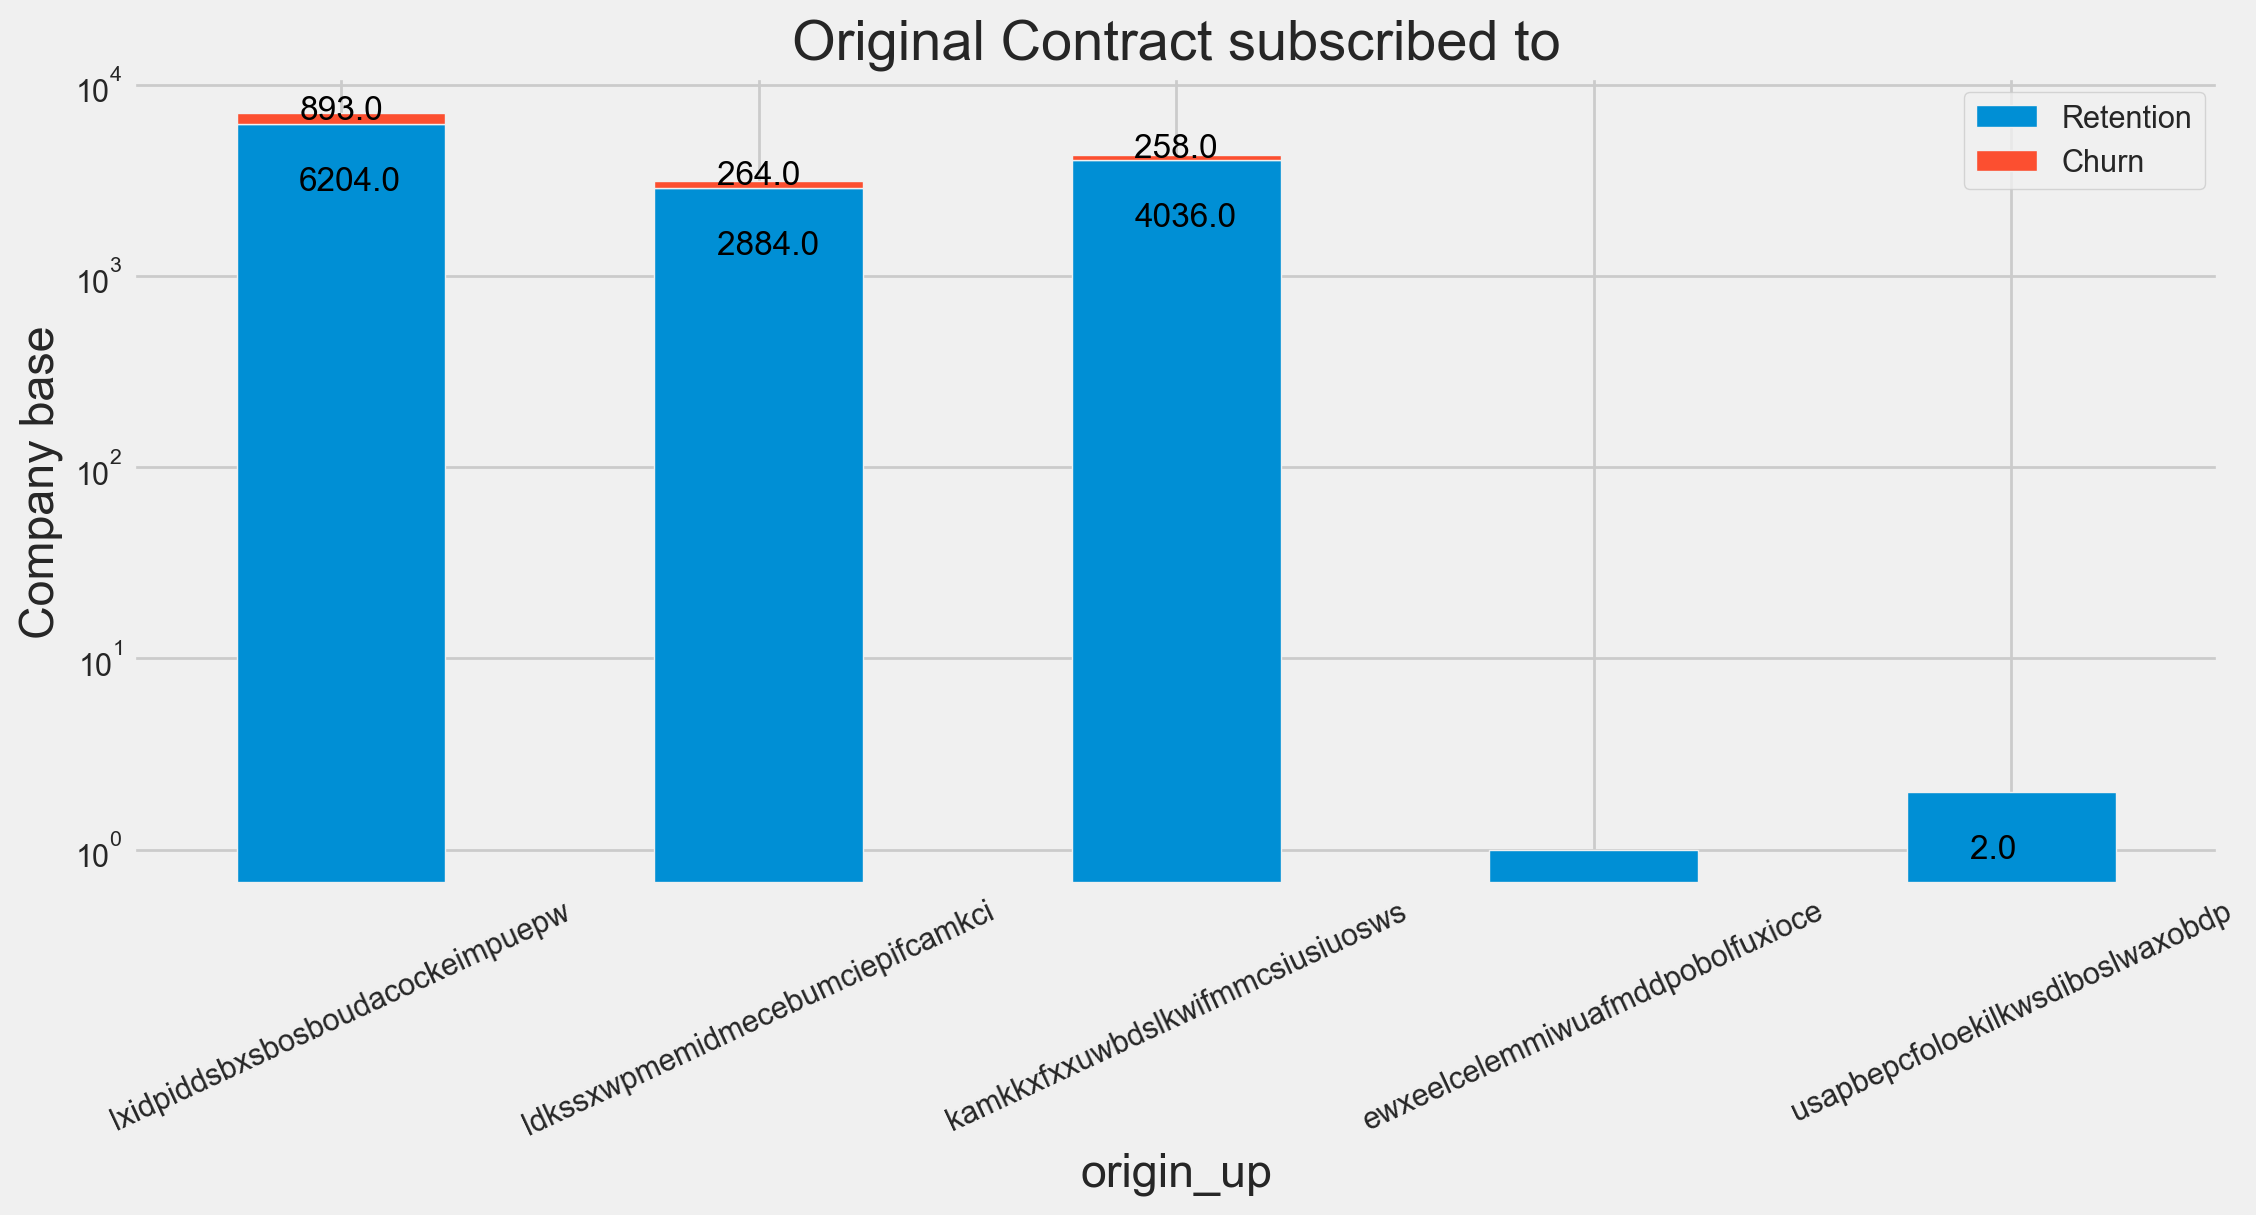

In [28]:
origin_up=client_df.groupby([client_df['origin_up'],client_df['churn']])['id'].count().unstack(level=1)
origin_up.sort_values(1, ascending=False, inplace=True)
ax=origin_up.plot(kind='bar',stacked=True,figsize=(12,5),rot=0)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)-0.1,p.get_y()+p.get_height()/2*0.9),
               color='black',size=(12))
ax.set_yscale('log')
plt.gcf().set_dpi(200)
plt.title('Original Contract subscribed to')
plt.legend(['Retention','Churn'],loc="upper right")
plt.xticks(rotation=25)
plt.ylabel("Company base");

In [29]:
price_df.sort_values('price_date', inplace=True)
grouped_df = price_df.groupby('id')
first_half = grouped_df.head(6).groupby('id').mean()
first_half.columns = ['first_'+column for column in first_half.columns]
last_half = grouped_df.tail(6).groupby('id').mean()
last_half.columns = ['last_'+column for column in last_half.columns]

In [30]:
result_df = pd.concat([first_half, last_half], axis=1)
result_df.reset_index(inplace=True)
result_df = pd.merge(result_df, client_df[['id','churn']], on="id")
result_df

,id,first_price_off_peak_var,first_price_peak_var,first_price_mid_peak_var,first_price_off_peak_fix,first_price_peak_fix,first_price_mid_peak_fix,last_price_off_peak_var,last_price_peak_var,last_price_mid_peak_var,last_price_off_peak_fix,last_price_peak_fix,last_price_mid_peak_fix,churn
0,0002203ffbb812588b632b9e628cc38d,0.127411,0.105220,0.072593,40.674580,24.404747,16.269833,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,0
1,0004351ebdd665e6ee664792efc4fd13,0.148166,0.000000,0.000000,44.326191,0.000000,0.000000,0.144687,0.000000,0.000000,44.444710,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.161093,0.000000,0.000000,44.694710,0.000000,0.000000,0.202024,0.000000,0.000000,45.944710,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.149668,0.000000,0.000000,44.266931,0.000000,0.000000,0.146184,0.000000,0.000000,44.266930,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.129145,0.106976,0.074372,40.728885,24.437330,16.291555,0.123007,0.104108,0.075469,40.728885,24.437330,16.291555,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,ffebf6a979dd0b17a41076df1057e733,0.126409,0.104273,0.072331,40.565970,24.339580,16.226388,0.118442,0.100477,0.072089,40.647429,24.388454,16.258969,0
14602,fffac626da707b1b5ab11e8431a4d0a2,0.148825,0.000000,0.000000,44.266931,0.000000,0.000000,0.145449,0.000000,0.000000,44.355820,0.000000,0.000000,0
14603,fffc0cacd305dd51f316424bbb08d1bd,0.154998,0.131427,0.098280,41.091456,24.854206,16.735583,0.152759,0.127566,0.091403,41.228885,24.937330,16.791555,0
14604,fffe4f5646aa39c7f97f95ae2679ce64,0.127566,0.105428,0.073487,40.565970,24.339580,16.226388,0.120150,0.101570,0.073983,40.647429,24.388454,16.258969,0


In [31]:
means = result_df.groupby('churn').mean().reset_index()
means

,churn,first_price_off_peak_var,first_price_peak_var,first_price_mid_peak_var,first_price_off_peak_fix,first_price_peak_fix,first_price_mid_peak_fix,last_price_off_peak_var,last_price_peak_var,last_price_mid_peak_var,last_price_off_peak_fix,last_price_peak_fix,last_price_mid_peak_fix
0,0,0.144467,0.052156,0.027533,42.849776,9.267639,5.979476,0.140284,0.051004,0.027927,42.957777,9.281092,5.987646
1,1,0.144096,0.057301,0.033143,43.103368,11.191712,7.154866,0.139681,0.055834,0.033573,43.220660,11.203630,7.166263


C:\Users\DELL\AppData\Local\Temp\ipykernel_20964\2472559064.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


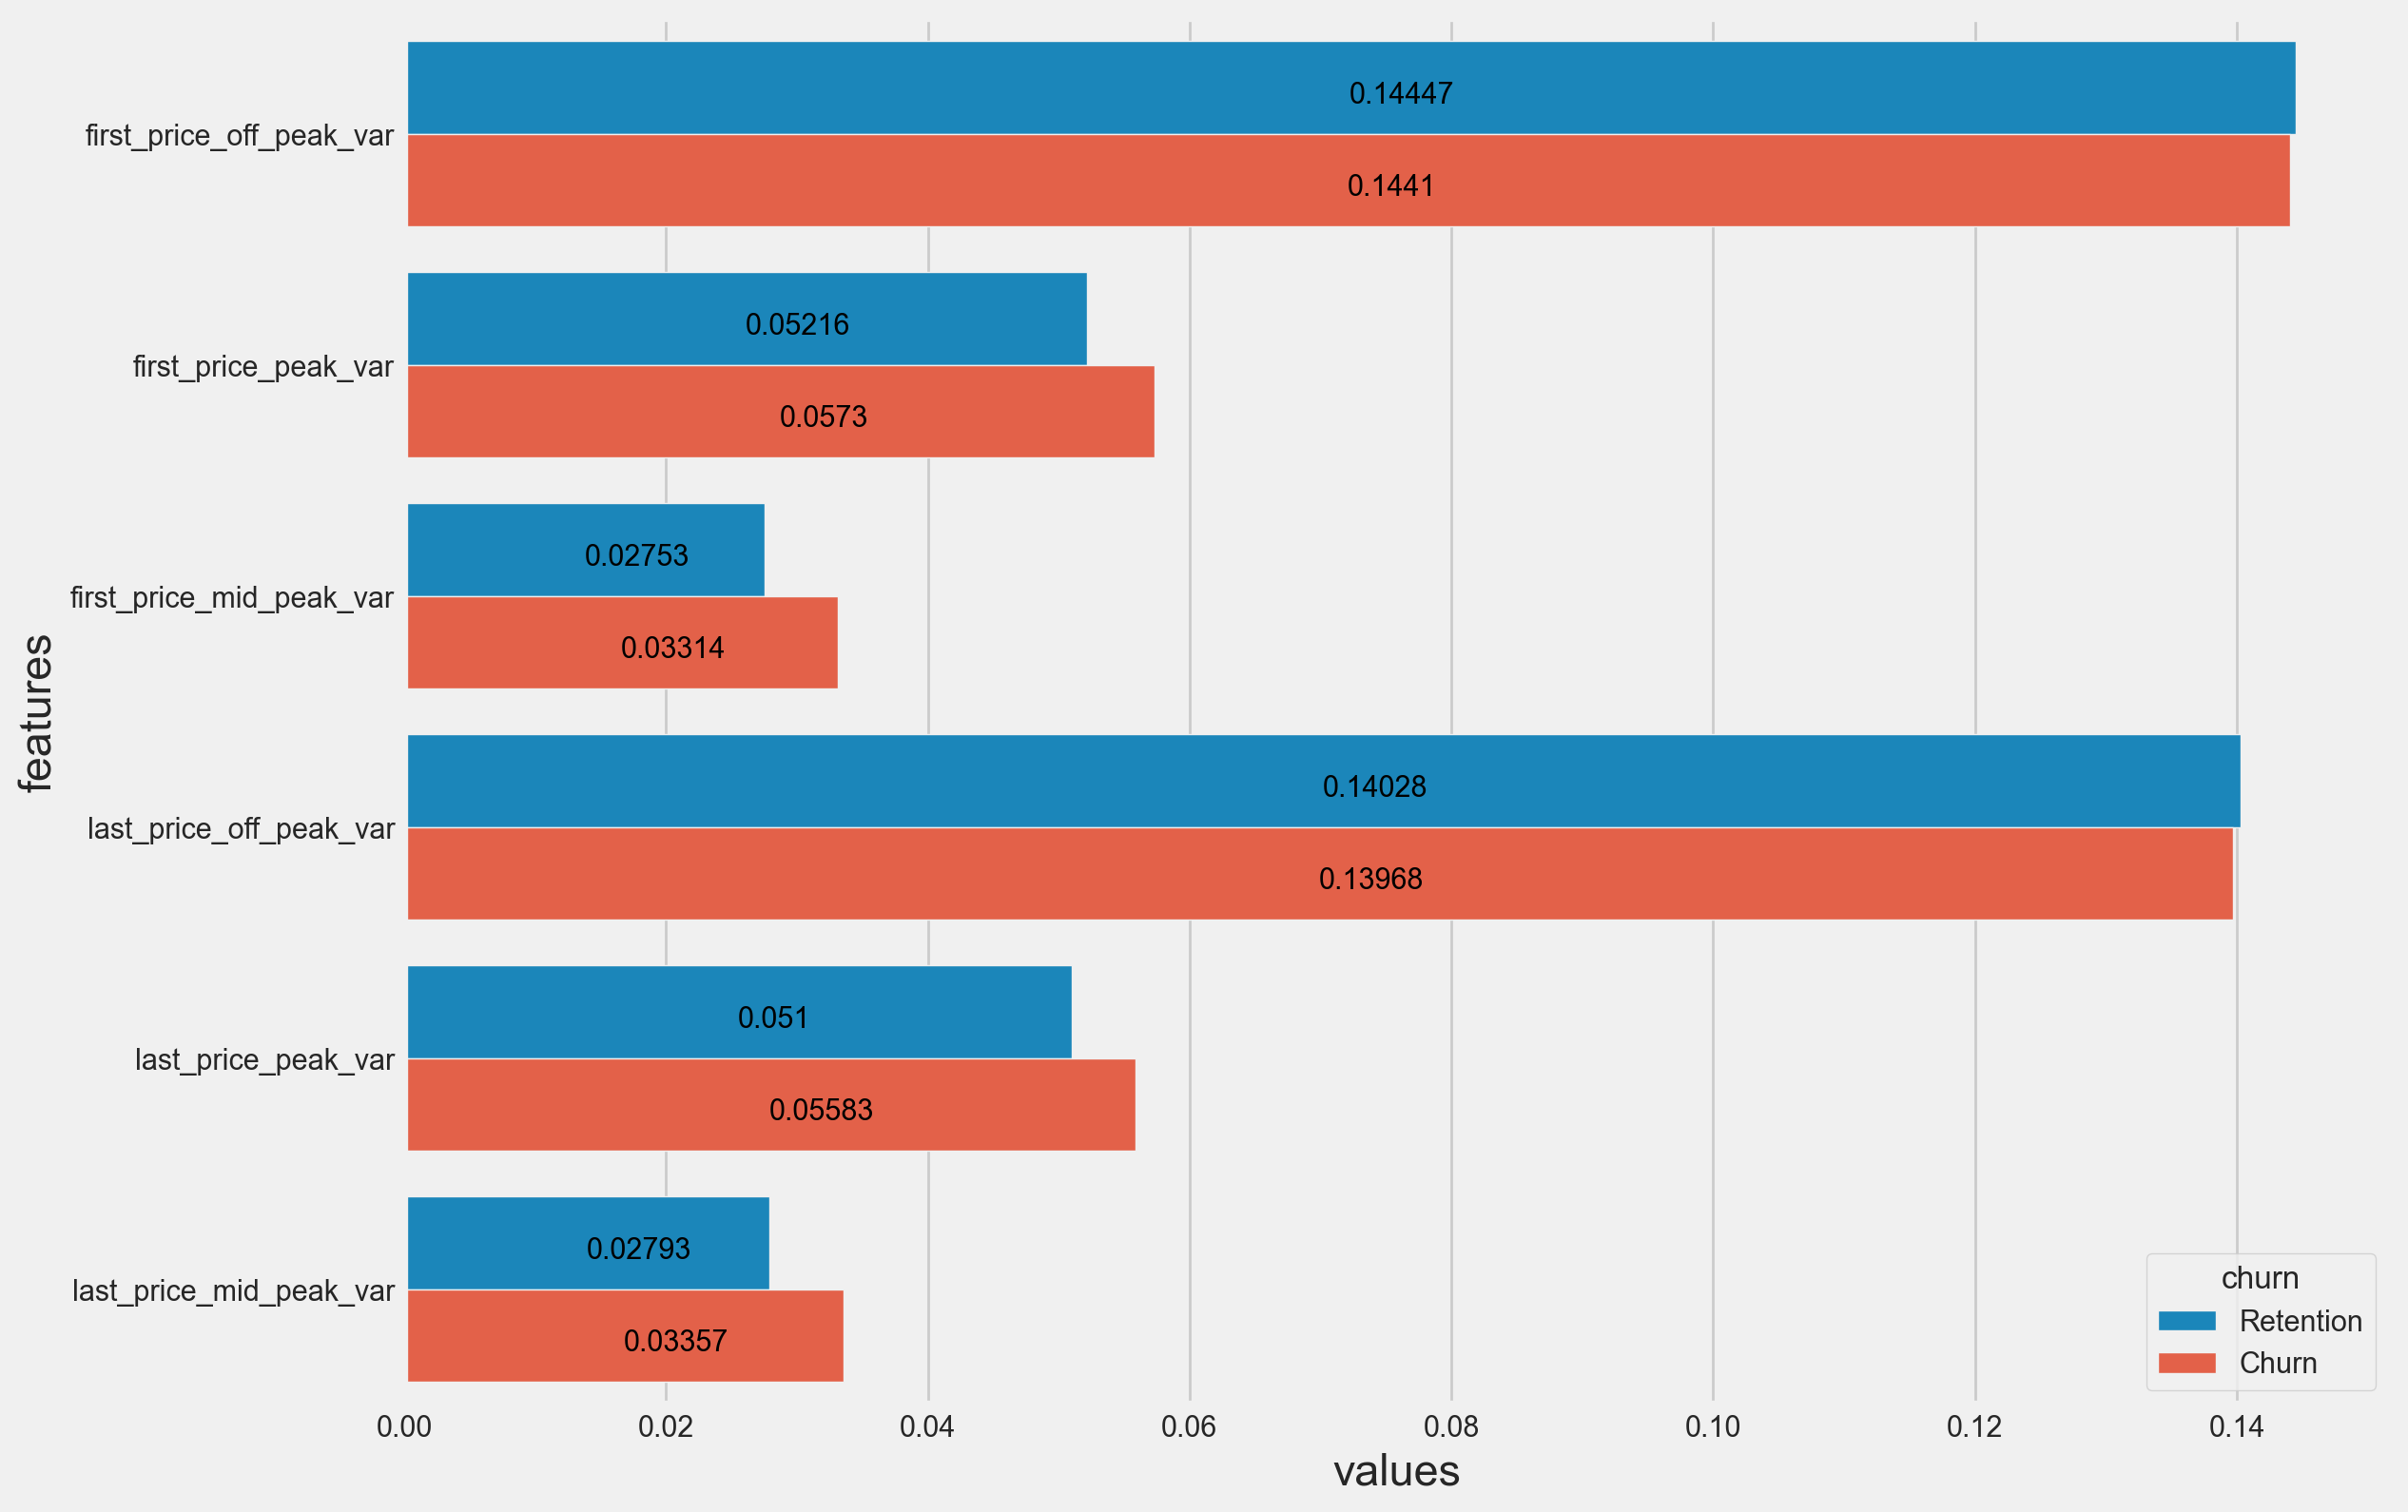

In [32]:
melted_df = pd.melt(means[['churn', 'first_price_off_peak_var', 'first_price_peak_var', 'first_price_mid_peak_var',
                          'last_price_off_peak_var', 'last_price_peak_var', 'last_price_mid_peak_var']], 
                    id_vars=['churn'], var_name='features', value_name='values')
melted_df['churn'].replace({0:'Retention',1:'Churn'}, inplace=True)
# create the bar plot
plt.figure(figsize=(12,9), dpi=200)
sns.barplot(data=melted_df, y='features', x='values', hue='churn')
ax = plt.gca()
for p in ax.patches:
    value=str(round(p.get_width(),5))
    ax.annotate(value,((p.get_x()+p.get_width()/2),p.get_y()+p.get_height()/1.5),
               color='black',size=(11))
plt.style.use('seaborn-dark')
plt.show()

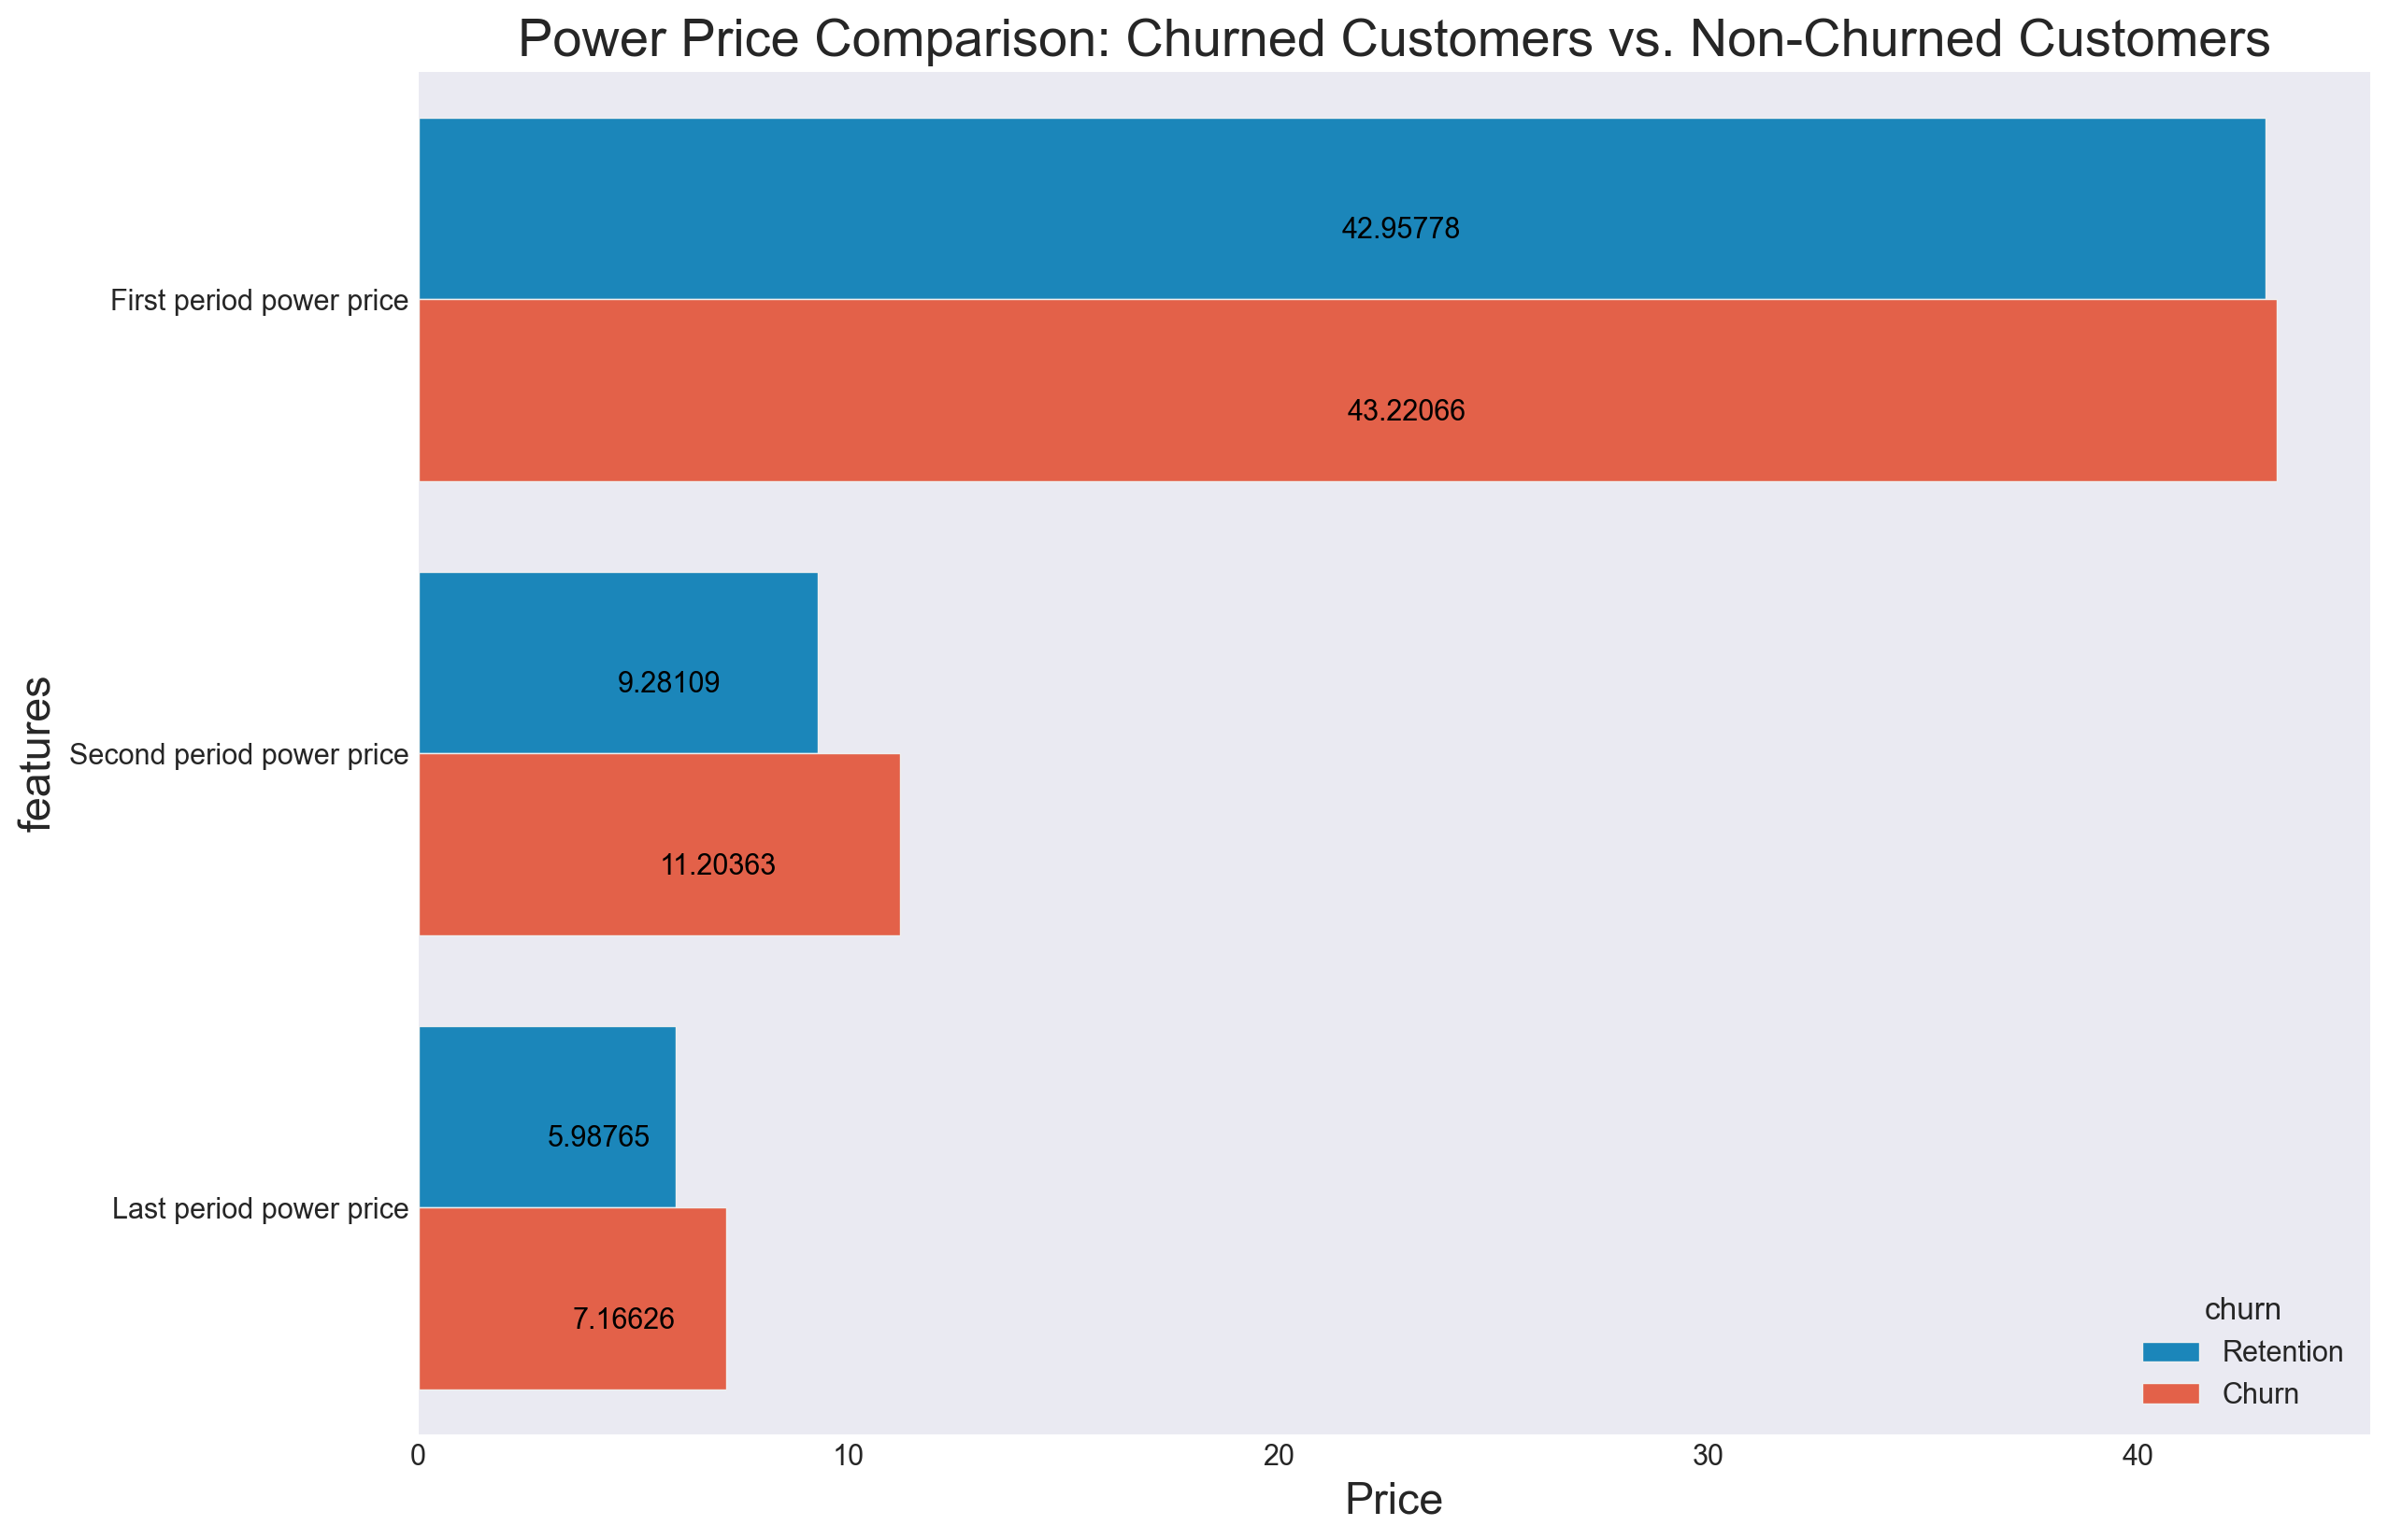

In [33]:
melted_df = pd.melt(means[['churn', 'first_price_off_peak_fix', 'first_price_peak_fix', 'first_price_mid_peak_fix',
                          'last_price_off_peak_fix', 'last_price_peak_fix', 'last_price_mid_peak_fix']], 
                    id_vars=['churn'], var_name='features', value_name='value')
melted_df['churn'].replace({0:'Retention',1:'Churn'}, inplace=True)
melted_df = melted_df[(melted_df['features'] == 'last_price_off_peak_fix') | (melted_df['features'] =='last_price_peak_fix') | (melted_df['features'] =='last_price_mid_peak_fix')]
# create the bar plot
plt.figure(figsize=(12,9), dpi=200)
sns.barplot(data=melted_df, y='features', x='value', hue='churn')
#plt.xscale('log')
plt.xlabel('Price')
plt.title('Power Price Comparison: Churned Customers vs. Non-Churned Customers')
ax = plt.gca()
ax.set_yticklabels(['First period power price', 'Second period power price', 'Last period power price'])
for p in ax.patches:
    value=str(round(p.get_width(),5))
    ax.annotate(value,((p.get_x()+p.get_width()/2),p.get_y()+p.get_height()/1.5),
               color='black',size=(11))
plt.show()

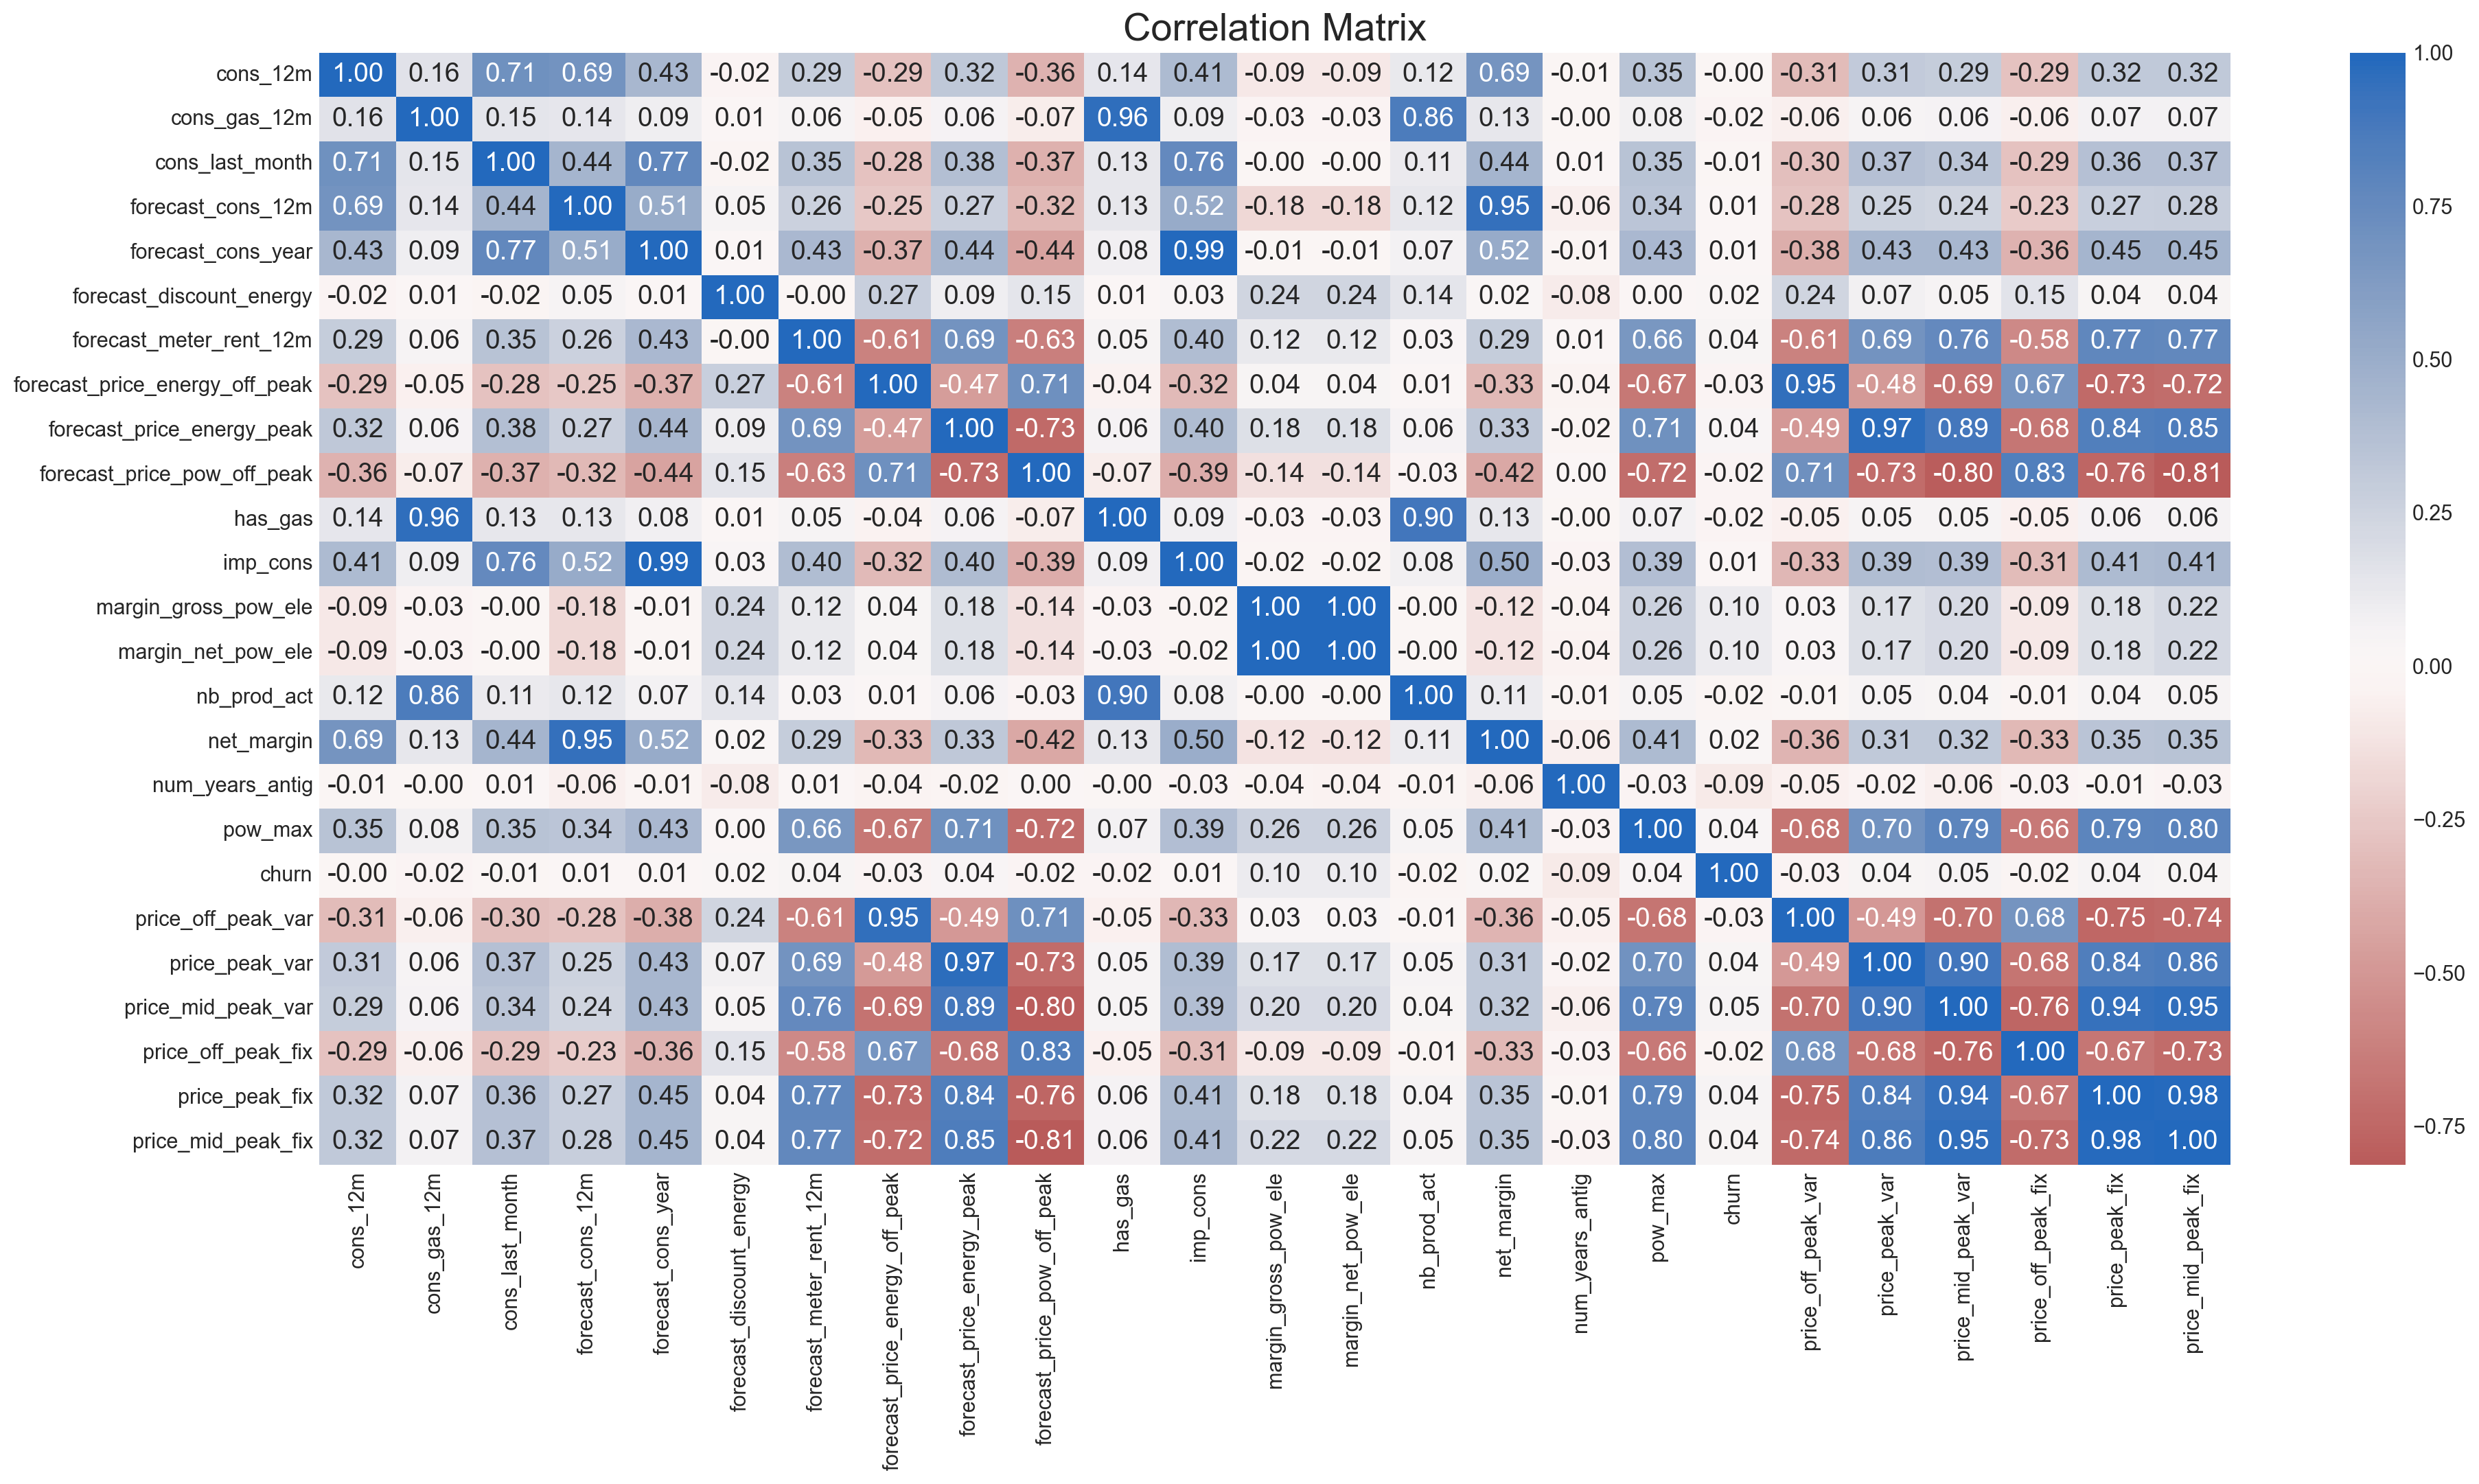

In [34]:
result_df = price_df.groupby('id').mean().reset_index()
result_df = pd.merge(client_df, result_df, on='id')
corr_df = result_df.corr(method='spearman')
plt.figure(figsize=(20,10), dpi=200)
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='vlag_r', center=0);
plt.title("Correlation Matrix")
plt.xticks(rotation=90)
plt.show()

# Hypothesis Testing

In [35]:
hypothesis_df = pd.merge(price_df.groupby('id').mean(), client_df[['id','churn']], on="id")

In [36]:
columns = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
           'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']
for column in columns:
    ttest_result = ttest_ind(hypothesis_df[hypothesis_df['churn']==0][column],
                             hypothesis_df[hypothesis_df['churn']==1][column], 
                             equal_var=False)
    print(column)
    print(ttest_result)

price_off_peak_var
Ttest_indResult(statistic=0.8211123599141759, pvalue=0.41169173776073953)
price_peak_var
Ttest_indResult(statistic=-3.5426368995008963, pvalue=0.0004066588047157293)
price_mid_peak_var
Ttest_indResult(statistic=-5.492976113937087, pvalue=4.544122703842065e-08)
price_off_peak_fix
Ttest_indResult(statistic=-2.773806423387592, pvalue=0.005588180822944846)
price_peak_fix
Ttest_indResult(statistic=-5.5630042315334345, pvalue=3.070692292051358e-08)
price_mid_peak_fix
Ttest_indResult(statistic=-5.313028093578066, pvalue=1.2187439227124315e-07)


In [37]:
def hypothesis_test(df, columns):
    # Split the data into two separate groups
    churn = df[df['churn'] == 1]
    ret = df[df['churn'] == 0]
    fig, ax = plt.subplots(3, 2, figsize=(13,11), dpi=200)
    i = 0
    for index, column in enumerate(columns):
        # Calculate the means and standard deviations of each group
        churn_mean = churn[column].mean()
        churn_std = churn[column].std()
        ret_mean = ret[column].mean()
        ret_std = ret[column].std()

        # Define a function to generate bootstrap samples
        def bootstrap(data):
            return np.random.choice(data, size=len(data), replace=True)

        # Generate 10,000 bootstrap samples of the data
        churn_bootstrap_means = [bootstrap(churn[column]).mean() for i in range(10000)]
        ret_bootstrap_means = [bootstrap(ret[column]).mean() for i in range(10000)]

        # Calculate the difference between the means of the two groups
        mean_diff = churn_mean - ret_mean

        # Calculate the p-value by comparing the observed difference to the distribution of differences from the bootstrap samples
        null_diff = np.array(churn_bootstrap_means) - np.array(ret_bootstrap_means)
        p_value = (null_diff <= 0).mean()

        # Print the results
        print(column)
        print(f"Bootstrap p-value: {p_value}")

        CI = np.percentile(null_diff, [2.5,97.5])
        print(f"CI: {CI}")
        print("------------------------")
        if index == 3:
            i += 1
        ax[index%3, i].hist(null_diff, bins=40, alpha=1)
        ax[index%3, i].axvline(np.percentile(null_diff,2.5),color = 'red',linewidth=2, label='Confidence Interval')
        ax[index%3, i].axvline(np.percentile(null_diff,97.5),color = 'red',linewidth=2)
        ax[index%3, i].axvline(mean_diff,color = 'black',linewidth=2, label='Mean Difference')
        ax[index%3, i].axvline(0,color = 'green',linewidth=2, label = 'Zero')
        ax[index%3, i].set_title(column)
        ax[index%3, i].set_ylabel("Frequency")
    handles, labels = ax[0,0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center',bbox_to_anchor=(0.5, 0),
          fancybox=True, shadow=True, ncol=5)
    plt.show()

price_off_peak_var
Bootstrap p-value: 0.7984
CI: [-0.0016165   0.00068434]
------------------------
price_peak_var
Bootstrap p-value: 0.0004
CI: [0.0023267  0.00765914]
------------------------
price_mid_peak_var
Bootstrap p-value: 0.0
CI: [0.00362992 0.00758666]
------------------------
price_off_peak_fix
Bootstrap p-value: 0.0019
CI: [0.07806236 0.44246099]
------------------------
price_peak_fix
Bootstrap p-value: 0.0
CI: [1.24851876 2.58559998]
------------------------
price_mid_peak_fix
Bootstrap p-value: 0.0
CI: [0.73979167 1.61336331]
------------------------


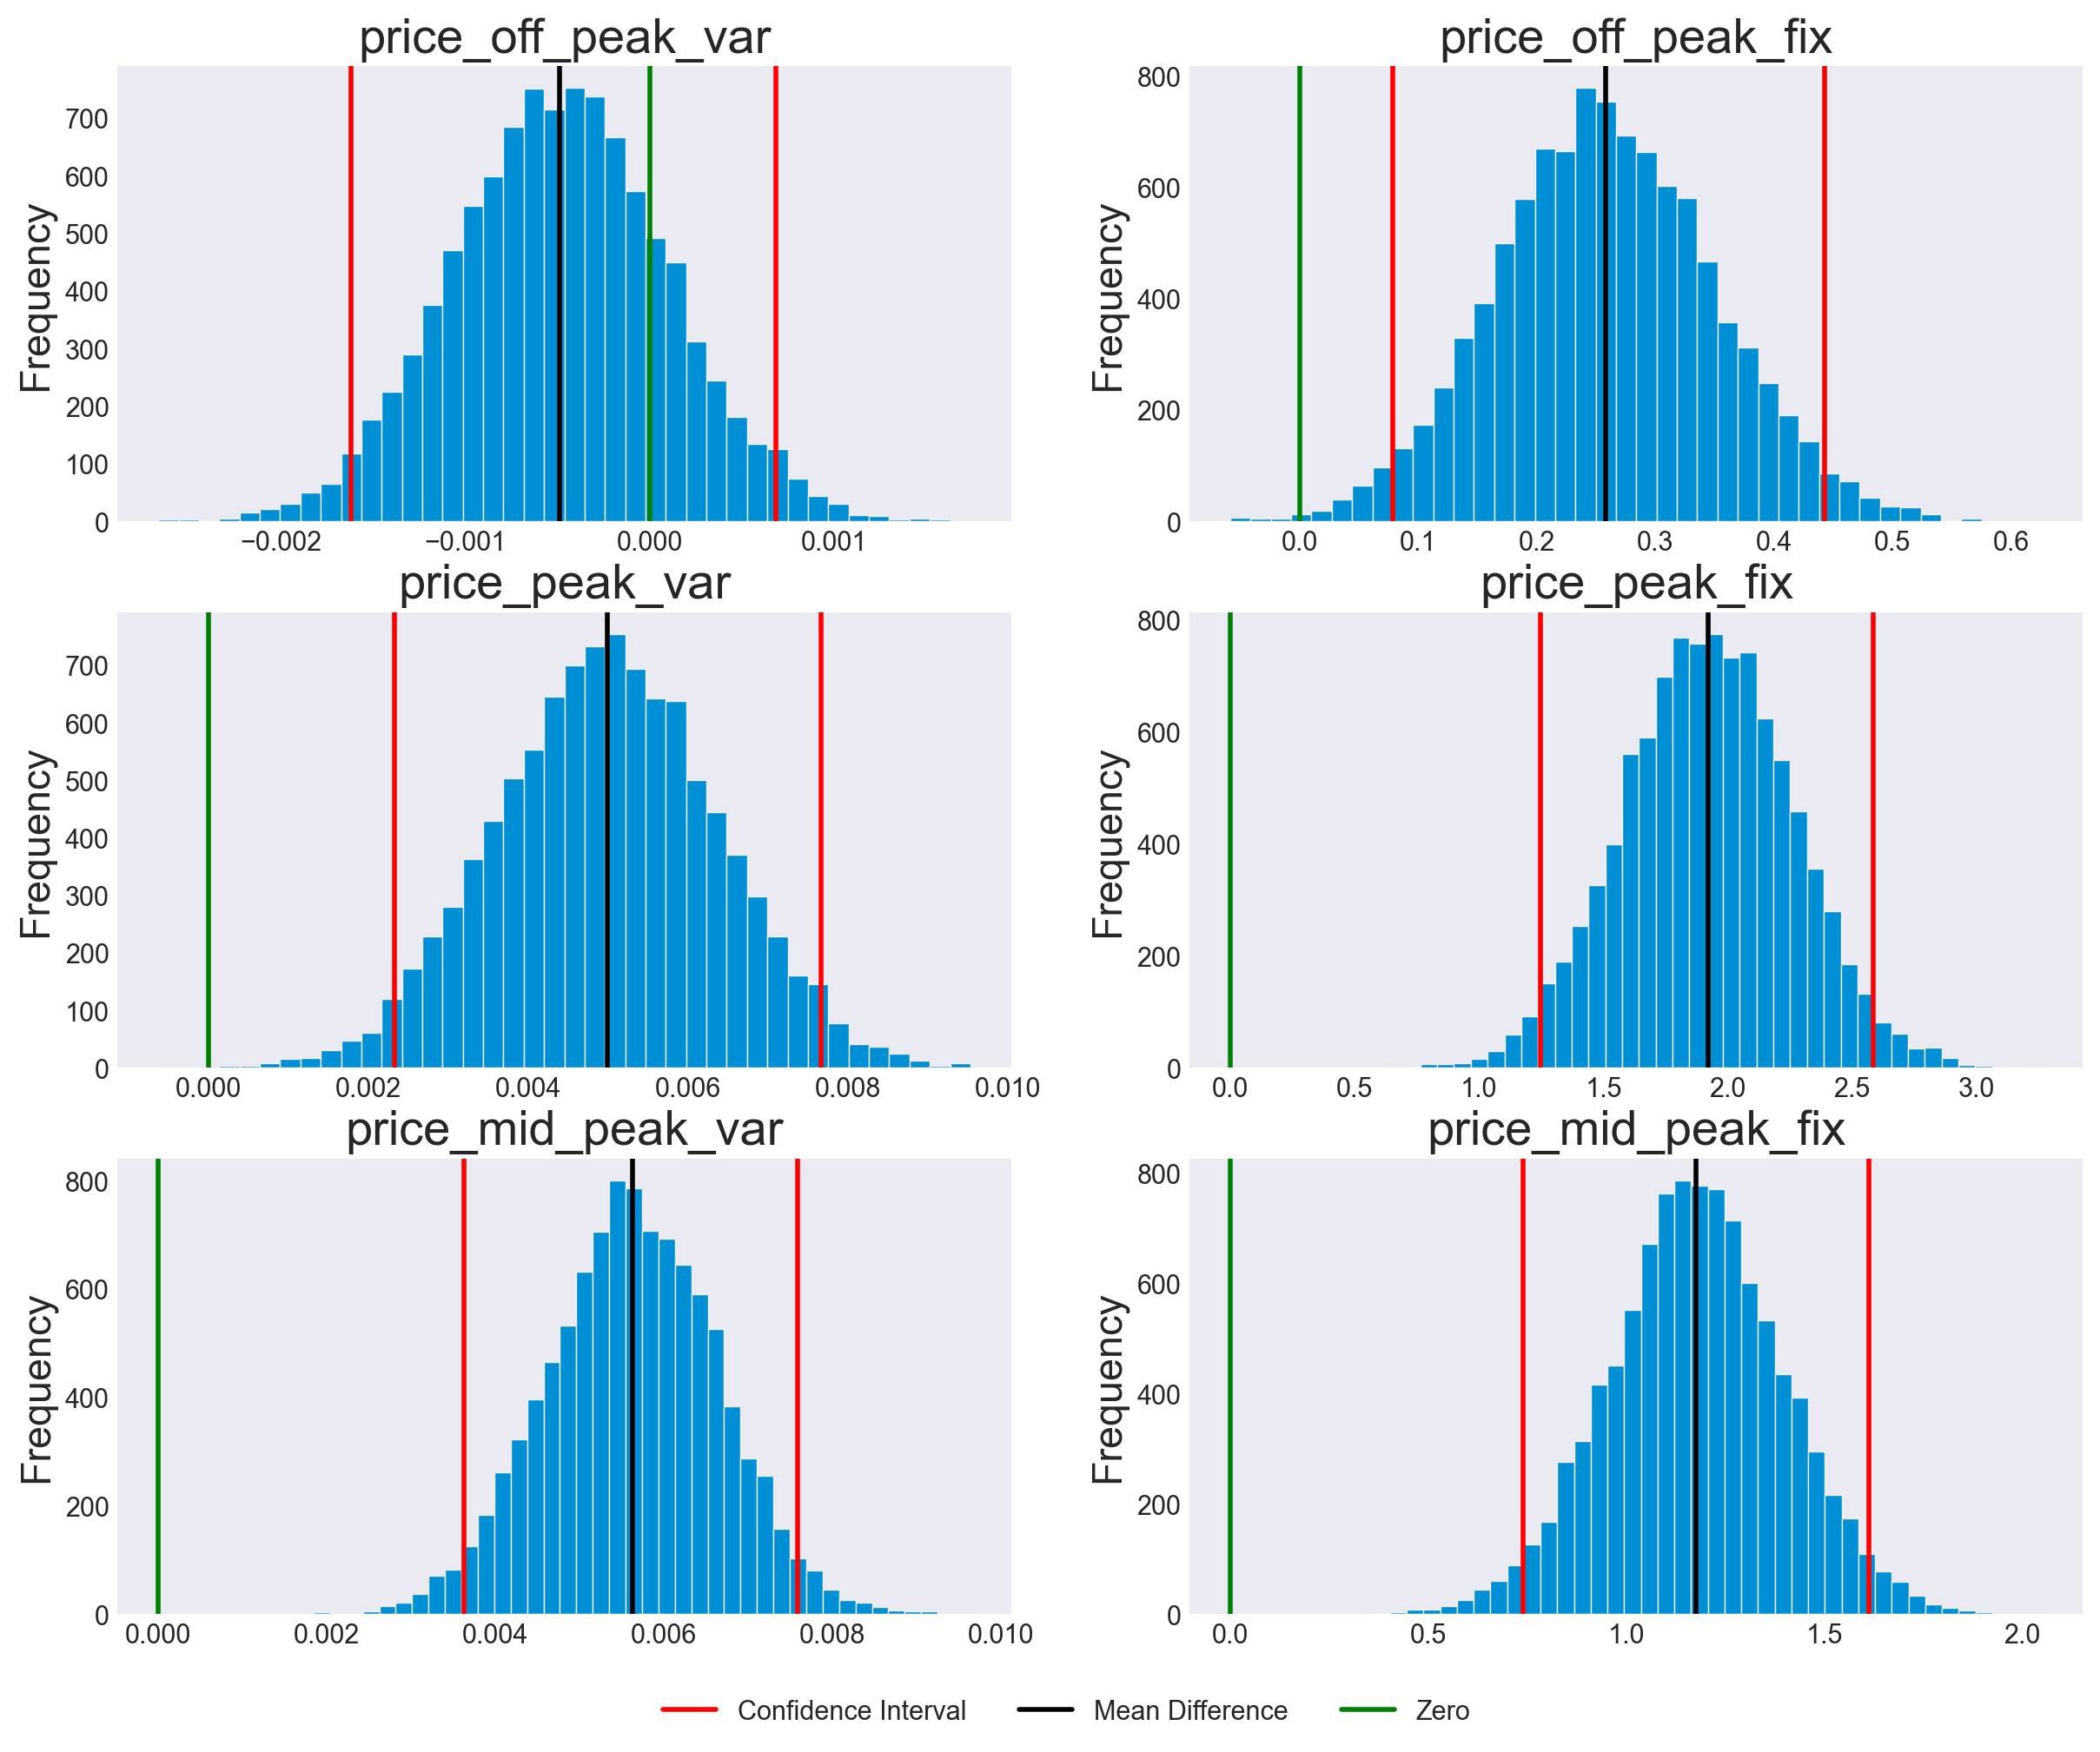

In [38]:
hypothesis_test(hypothesis_df, columns)

### Results
- Both the t-test and Bootstrap gave similar and aggreable results.

The following results are for `price_off_peak_var`:
- The **t-test p-value** is 0.41 and the **bootstrap p-value** is 0.79. Both values are larger than the significance level (> 0.05). Hence, we fail to reject the null hypothesis for `price_off_peak_var` column.

> **Null hypothesis:** there is no significant difference between the mean of price of the two groups (churn/retention).

The following results are for all the other price columns:
- We see that both **bootstrap p-value** and **t-test p-value** for all price features but `price_off_peak_var` are not significant (< 0.05). Which means that we reject the null hypothesis for those columns.
- The Histograms of the distribution of the mean bootstrap differences shows that **95%** of the mean differences are larger than zero which confirms the alternative hypothesis. 

> **Alternative hypothesis:** there is a significant difference between the mean of price of the two groups (churn/retention).
- Furthermore, The distributions show that the difference is that the mean of price for customers who churned is larger than the mean price for customers who did not.

---
## Conclusions
- The distribution shows that **9.7%** of customers have churned while **90.3%** are clients still for PowerCo.
- The distribution of all consumption features is highly positively skewed.
- There are very few SME that consume relatively larger amounts of energy or gas than the absolute majority of other clients.
- Most customers are acquired between mid 2009 and the beginning 2013.
- All the contracts in the dataset will expire on 2016 or January, 2017.
- Most contracts are scheduled to be renewed by 2015.
- **78%** of customers are benefitting of only 1 product of PowerCo.
- **94.4%** of SME clients who churned have been with the company between **3** to **6** years.
- A concerning number of **28** SME have churned after being clients for PowerCo for more than **10** years.
- `lxidpiddsbxsbosboudacockeimpuepw` plan has the highest churn probability of **14.4%**.
- Churned SME tend to pay more than those who are still customers. Which suggests that the pricing strategy is the reason of churn.
- There is an increase in price for all companies due to the increased cost of energy.
- Churned SME paid more than SME that are still clients for PowerCo is proven to be statistically significant by t-test and bootstrapping.

---
## Limitations
- The missing values in some columns of `client_df`.
- there are some outliers in `client_df`.